# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
import json
import pandas as pd

In [2]:
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [4]:
#First saw data is a dict
data.keys()

dict_keys(['meta', 'data'])

In [16]:
#Meta is a dict
data['meta'].keys()
#just one key of view
type(data['meta']['view'])
#view is a dict
data['meta']['view'].keys()
#this is my key informations

dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags'])

In [14]:
type(data['data'])
#data is a list
len(data['data'])
#huuuuugggee list
data['data'][1]

[2,
 'F4468C3D-340A-4CD2-84A3-DF554DFF065E',
 2,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'AL',
 'Alabama',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '13',
 '13',
 None,
 None,
 '11.9',
 '14.1',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, '32.84057112200048', '-86.63186076199969', None, False],
 None,
 '01',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [25]:
cols = data['meta']['view']['columns']
names = [x['name'] for x in cols]
names
df = pd.DataFrame(data['data'], columns=names)
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [69]:
asthma_rates = df.query('Question == "Current asthma prevalence among adults aged >= 18 years" & StratificationCategory1 == "Overall" & DataValueTypeID == "CRDPREV"')

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

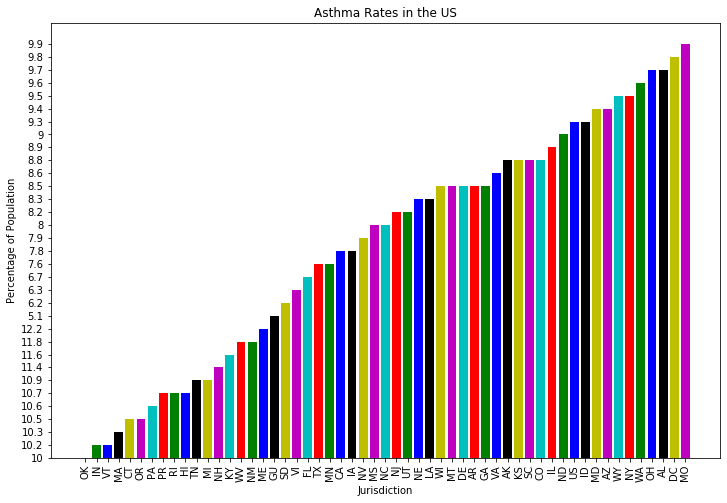

In [87]:
x = asthma_rates.sort_values('DataValue')['LocationAbbr']
y = asthma_rates.sort_values('DataValue')['DataValue']

plt.figure(figsize=(12,8))
plt.bar(x, y, color='rgbkymc')
plt.title('Asthma Rates in the US')

plt.xlabel('Jurisdiction')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Population');


## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!